## Notebook to solve the following riemann problem. Plot solution in x-t plane

\begin{equation*}
A =  \begin{vmatrix}
0 & 0 & 4 \\
0 & 1 & 0 \\
1 & 0 & 0
\end{vmatrix}
\end{equation*}

\begin{equation*}
(q_r-q_l) =  \begin{vmatrix}
0 \\
3 \\
1
\end{vmatrix}
\end{equation*}

###  Solve the riemann problem (decompose the jump into waves from the basis set created using the eigenvectors of A)

In [1]:
import numpy as np

A = [[0,0,4],[0,1,0],[1,0,0]]  # coefficient array
jump = [[0],[3],[1]]  # (q_r-q_l) array

eigenvalues,R = np.linalg.eig(A) # compute eigenvalues and right eigenvalues of A

# Sort in ascending order
index = np.argsort(eigenvalues)
eigenvalues = eigenvalues[index]
R = R[:,index] # note COLUMN R[:,i] is the eigenvector for eigenvalue i

L = np.linalg.inv(R) # Get R^-1

alpha = np.matmul(L,jump)  # get strenth of jump across p characteristic

print 'Alpha:\n',alpha

# check that we have decomposed our jump into the new basis
test_jump = np.matmul(R,alpha)

print 'Original Jump:\n',np.asarray(jump)
print 'Recovered Jump:\n',test_jump

Alpha:
[[ 1.11803399]
 [ 3.        ]
 [ 1.11803399]]
Original Jump:
[[0]
 [3]
 [1]]
Recovered Jump:
[[ -5.17794183e-17]
 [  3.00000000e+00]
 [  1.00000000e+00]]


### Plot solution in x-t plane

Obtaining Solution for Variable 1


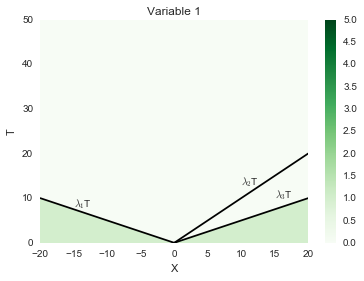

Obtaining Solution for Variable 2


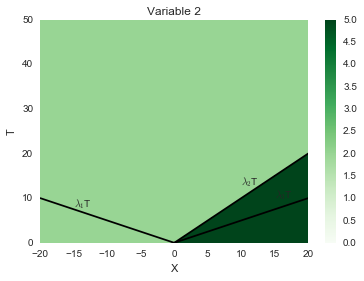

Obtaining Solution for Variable 3


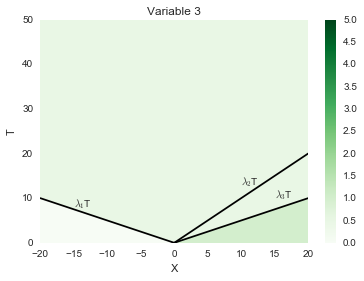

Done


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

q_left = [1,2,0]  # vector of left values
q_right = [1,5,1]

def q(x,t,index):
    q = q_left[index]
    for i in range(np.size(eigenvalues)):
        if (x-eigenvalues[i]*t) > 0:
            q = q + alpha[i]*R[:,i][index]
    return q

x_space = np.linspace(-20,20,501)
t_space = np.linspace(0,50,251)


# Get solution for each variable
for variable_index in range(np.size(q_left)):
    print 'Obtaining Solution for Variable',variable_index+1
    
    solution = np.zeros((np.size(x_space),np.size(t_space)))
    for i in range(np.size(x_space)):
        for j in range(np.size(t_space)):
            solution[i][j] = q(x_space[i],t_space[j],variable_index)  # solution[col][row]

    ## Plot
    plt.pcolormesh(x_space,t_space,solution.T,cmap='Greens',vmin=0.,vmax=5.)
    plt.colorbar()
    for i in range(np.size(eigenvalues)):
        plt.plot(x_space,1./eigenvalues[i]*x_space,color='black')
    plt.ylim((0,np.max(t_space)))
    plt.xlim((np.min(x_space),np.max(x_space)))
    plt.title('Variable '+str(variable_index+1))
    plt.annotate(r'$\lambda_1$T',(-15,8))
    plt.annotate(r'$\lambda_2$T',(10,13))
    plt.annotate(r'$\lambda_3$T',(15,10))
    plt.xlabel('X')
    plt.ylabel('T')
    #plt.savefig('variable_'+str(variable_index)+'.pdf')
    #plt.clf()
    plt.show()
print 'Done'

### The solution is correct.
- Variable 1 goes from 1 to 1 with a drop down to zero at the first characteristic and a jump back up to one at the last.
- Variable 2 goes from 2 to 5 with the entire jump coming across the second characteristic
- Variable 3 goes from 0 to 1 with a fraction of the jump across the first characteristic and a fraction across the last.